<a href="https://colab.research.google.com/github/manas-jha/Real-Estate-Price-Prediction/blob/master/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import display

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/manas-jha/Real-Estate-Price-Prediction/master/Datasets/house_price-Dataset.csv')
df.head()

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,Coomee,2 BHK,1056,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,Theanmp,4 Bedroom,2600,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,NaN,3 BHK,1440,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,Soiewre,3 BHK,1521,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,NaN,2 BHK,1200,1200.0,2.0,1.0,Ready to move,51.00


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13314 non-null  object 
 1   location         13314 non-null  object 
 2   society          7817 non-null   object 
 3   size             13298 non-null  object 
 4   total_sqft       13314 non-null  object 
 5   sqft             13314 non-null  float64
 6   bath             13241 non-null  float64
 7   balcony          12706 non-null  float64
 8   possession date  13314 non-null  object 
 9   price            13314 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [81]:
print(df.columns)

Index(['area_type', 'location', 'society', 'size', 'total_sqft', 'sqft',
       'bath', 'balcony', 'possession date', 'price'],
      dtype='object')


In [82]:
df.describe()

,sqft,bath,balcony,price
count,1.331400e+04,13241.000000,12706.000000,13314.000000
mean,1.817241e+03,2.691564,1.584133,112.545076
std,1.427869e+04,1.339904,0.817198,148.998426
min,4.500000e+01,1.000000,0.000000,8.000000
25%,1.100000e+03,2.000000,1.000000,50.000000
50%,1.277000e+03,2.000000,2.000000,72.000000
75%,1.680000e+03,3.000000,2.000000,120.000000
max,1.306800e+06,40.000000,3.000000,3600.000000


In [83]:
df.dtypes

,0
area_type,object
location,object
society,object
size,object
total_sqft,object
sqft,float64
bath,float64
balcony,float64
possession date,object
price,float64


In [84]:
df.shape

(13314, 10)

In [85]:
df.isnull().sum()

,0
area_type,0
location,0
society,5497
size,16
total_sqft,0
sqft,0
bath,73
balcony,608
possession date,0
price,0


In [86]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8789
Built-up Area,2414
Plot Area,2024
Carpet Area,87


In [87]:
df['location'].value_counts().head()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234


In [88]:
df['society'].value_counts().head()

,count
society,
GrrvaGr,80
PrarePa,76
Prtates,59
Sryalan,59
GMown E,56


In [89]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4309
4 Bedroom,826
4 BHK,590
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,295
6 Bedroom,191


In [90]:
df['possession date'].value_counts().head()

,count
possession date,
Ready to move,10591
44158,6
43562,6
44154,6
44294,6


# Data Visualization

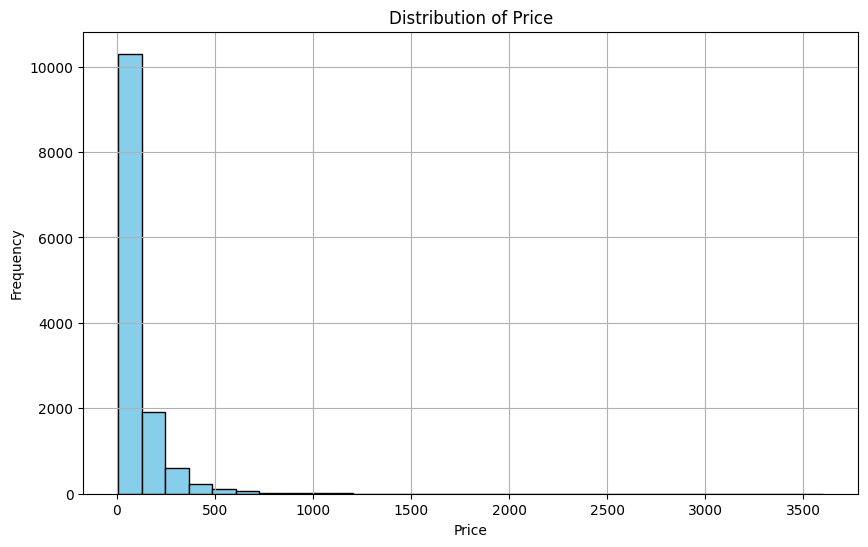

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

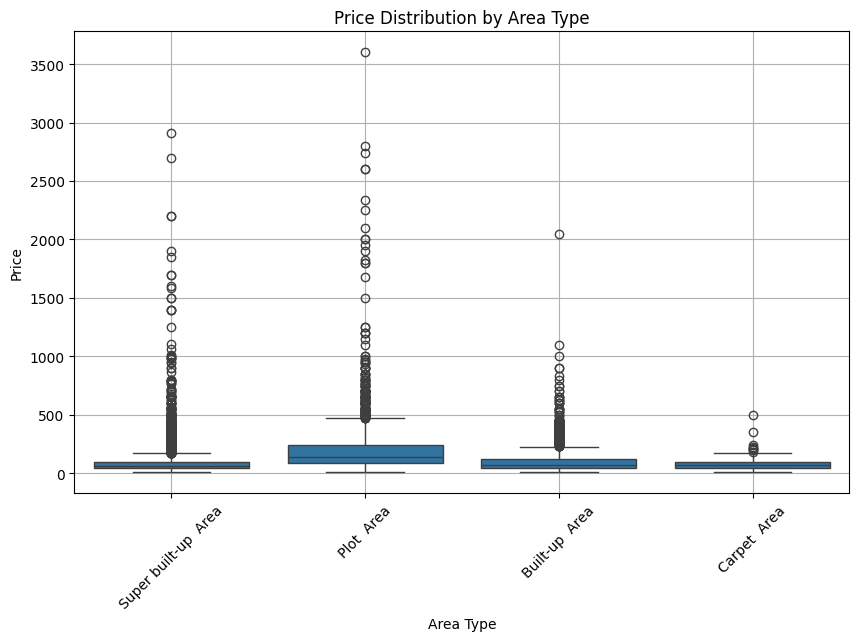

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Price Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

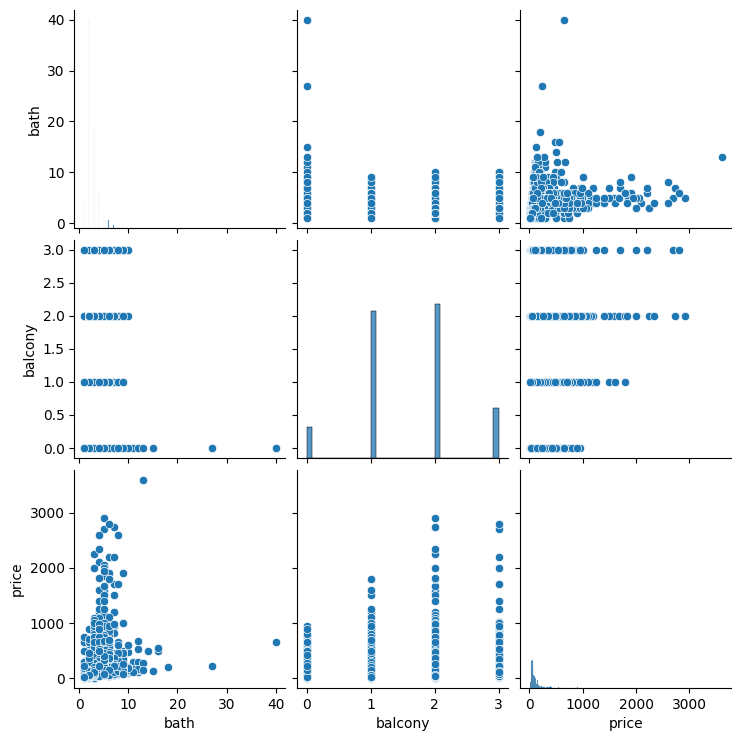

In [93]:
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object


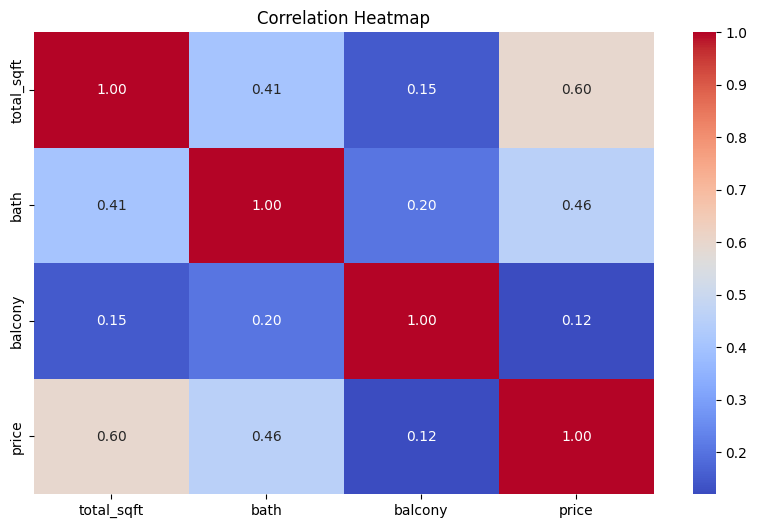

In [94]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df[['total_sqft', 'bath', 'balcony', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Check data types of the relevant columns
print(df[['total_sqft', 'bath', 'balcony', 'price']].dtypes)

# If 'total_sqft' is the problematic column, consider the following fix:
# (Adjust the column name and conversion logic as needed)

import pandas as pd

def convert_sqft_range(value):
    if '-' in value:
        lower, upper = value.split('-')
        return (float(lower) + float(upper)) / 2
    try:
        return float(value)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_range)

# Drop rows with missing values after conversion (if any)
df.dropna(subset=['total_sqft'], inplace=True)


plt.figure(figsize=(10, 6))
sns.heatmap(df[['total_sqft', 'bath', 'balcony', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [95]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

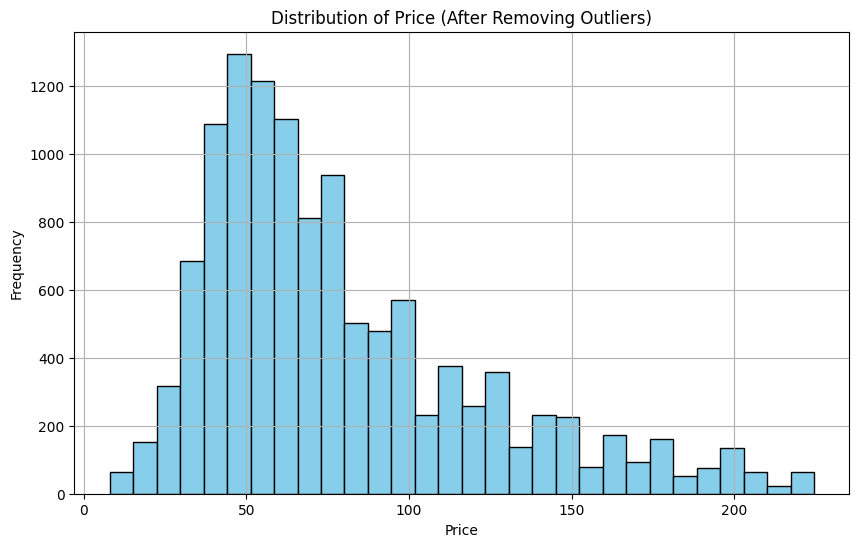

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11961 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        11961 non-null  object 
 1   location         11961 non-null  object 
 2   society          7217 non-null   object 
 3   size             11947 non-null  object 
 4   total_sqft       11961 non-null  float64
 5   sqft             11961 non-null  float64
 6   bath             11905 non-null  float64
 7   balcony          11581 non-null  float64
 8   possession date  11961 non-null  object 
 9   price            11961 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


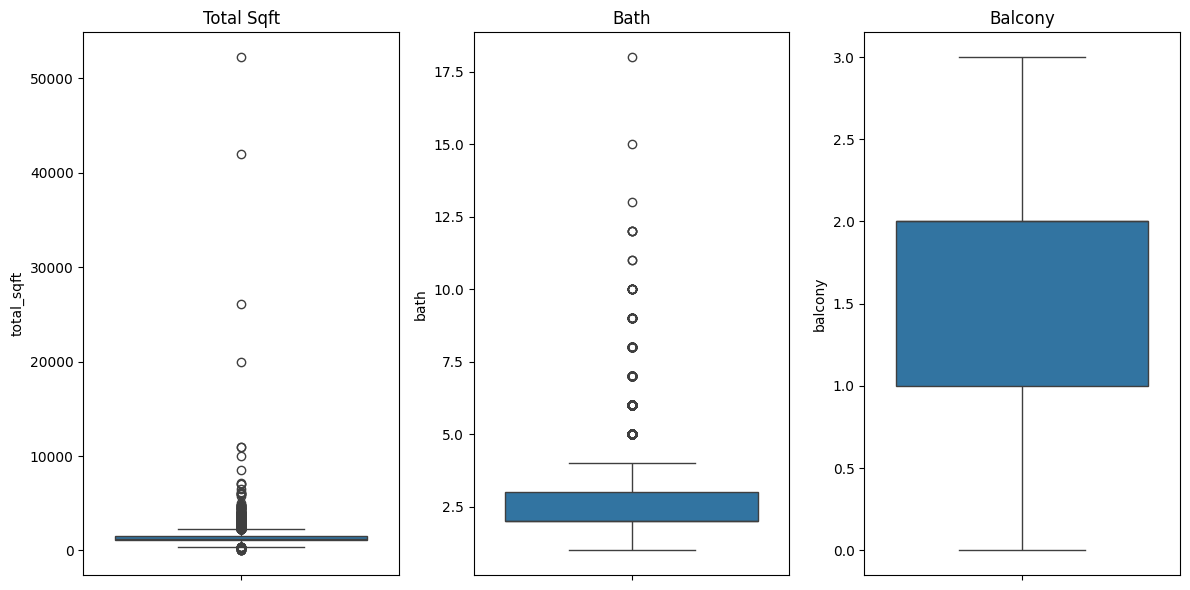

In [98]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='total_sqft', data=df)
plt.title('Total Sqft')

plt.subplot(1, 3, 2)
sns.boxplot(y='bath', data=df)
plt.title('Bath')

plt.subplot(1, 3, 3)
sns.boxplot(y='balcony', data=df)
plt.title('Balcony')

plt.tight_layout()
plt.show()

In [99]:
Q1_bath = df['bath'].quantile(0.25)
Q3_bath = df['bath'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath
df = df[(df['bath'] > lower_bound_bath) & (df['bath'] < upper_bound_bath)]

In [100]:
Q1_balcony = df['balcony'].quantile(0.25)
Q3_balcony = df['balcony'].quantile(0.75)
IQR_balcony = Q3_balcony - Q1_balcony
lower_bound_balcony = Q1_balcony - 1.5 * IQR_balcony
upper_bound_balcony = Q3_balcony + 1.5 * IQR_balcony
df = df[(df['balcony'] > lower_bound_balcony) & (df['balcony'] < upper_bound_balcony)]

In [101]:
df.describe()

,total_sqft,sqft,bath,balcony,price
count,11116.000000,11116.000000,11116.000000,11116.000000,11116.000000
mean,1324.574113,1325.029395,2.317470,1.555685,75.050773
std,715.428329,715.485139,0.694211,0.788270,40.010723
min,11.000000,45.000000,1.000000,0.000000,8.000000
25%,1075.000000,1075.000000,2.000000,1.000000,46.615000
50%,1225.000000,1225.000000,2.000000,2.000000,65.000000
75%,1510.000000,1510.000000,3.000000,2.000000,92.000000
max,52272.000000,52272.000000,4.000000,3.000000,224.000000


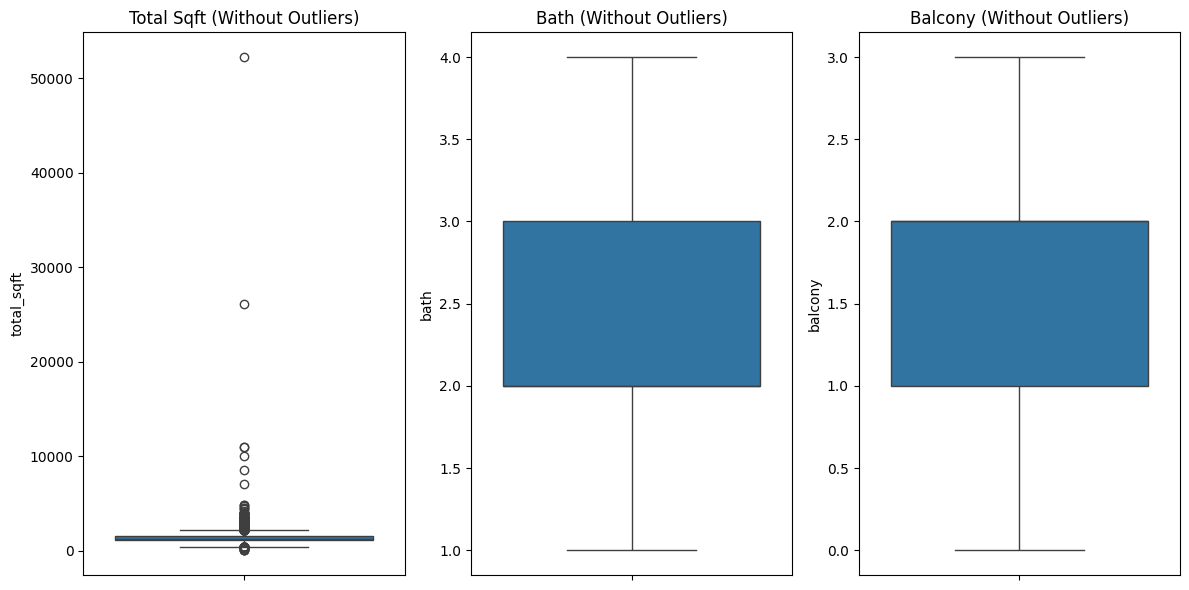

In [102]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='total_sqft', data=df)
plt.title('Total Sqft (Without Outliers)')

plt.subplot(1, 3, 2)
sns.boxplot(y='bath', data=df)
plt.title('Bath (Without Outliers)')

plt.subplot(1, 3, 3)
sns.boxplot(y='balcony', data=df)
plt.title('Balcony (Without Outliers)')

plt.tight_layout()
plt.show()

# Features Selection

In [103]:
def convert_to_sqft(x):
    try:
        if isinstance(x, float):
            return x
        elif 'Sq. Meter' in x:
            return float(x.split(' ')[0]) * 10.7639
        elif 'Acres' in x:
            return float(x.split(' ')[0]) * 43560
        else:
            return float(x)
    except (ValueError, AttributeError):
        return None

In [104]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df.dropna(subset=['total_sqft'], inplace=True)

In [105]:
selected_features = ['total_sqft', 'bath', 'balcony', 'size', 'location', 'price']
df_selected = df[selected_features]

In [106]:
df_selected = df[selected_features].copy()
df_selected.dropna(inplace=True)

In [107]:
X = df_selected.drop('price', axis=1)
y = df_selected['price']

In [108]:
X = pd.get_dummies(X, columns=['location'], drop_first=True)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
def clean_size(x):
    pattern = r'\d+'
    matches = re.findall(pattern, x)
    if matches:
        return int(matches[0])
    else:
        return None

In [111]:
df_selected['size'] = df_selected['size'].apply(clean_size)

In [112]:
df_selected.dropna(inplace=True)

In [113]:
X = df_selected.drop('price', axis=1)
y = df_selected['price']

In [114]:
X = pd.get_dummies(X, columns=['location'], drop_first=True)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3406122432.9048457


In [119]:
print("\nModel Coefficients:-")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Model Coefficients:-
                          Feature   Coefficient
0                      total_sqft  2.402812e-02
1                            bath  1.724416e+01
2                         balcony -1.107445e+00
3                            size  6.445937e+00
4             location_ Banaswadi  1.366361e+01
...                           ...           ...
1133          location_sankeswari  1.827978e-10
1134   location_sapthagiri Layout  6.975137e+01
1135  location_singapura paradise  3.252984e+01
1136            location_tc.palya  6.577328e-01
1137          location_whitefiled -2.099253e+01

[1138 rows x 2 columns]


In [120]:
# Model equation
coefficients_str = " + ".join(["{:.6f} * {}".format(coef, feat) for coef, feat in zip(model.coef_, X.columns)])
model_equation = "Predicted price = {:.6f} + {}".format(model.intercept_, coefficients_str)

In [121]:
# Value of β0 (intercept)
intercept_value = model.intercept_

In [122]:
# Features significance
significant_features = coefficients[coefficients['Coefficient'].abs() > 1]

In [123]:
# Print outputs
print("Model Equation:")
print(model_equation)
print("\nValue of β0 (Intercept):", intercept_value)
print("\nSignificant Features:")
print(significant_features)

Model Equation:
Predicted price = -15.016503 + 0.024028 * total_sqft + 17.244156 * bath + -1.107445 * balcony + 6.445937 * size + 13.663606 * location_ Banaswadi + 26.335048 * location_ Basavangudi + 7.104117 * location_ Bhoganhalli + 39.431134 * location_ Devarabeesana Halli + -0.764824 * location_ Devarachikkanahalli + 3.858281 * location_ Electronic City + 2.318662 * location_ Mysore Highway + 1.214840 * location_ Rachenahalli + 4.876819 * location_ Thanisandra + 22.688444 * location_ Whitefield + 57.880922 * location_ ittamadu + 149.183262 * location_12th cross srinivas nagar banshankari 3rd stage + -5.842192 * location_1st Block BEL Layout + 9.345002 * location_1st Block HBR Layout + 38.686219 * location_1st Block HRBR Layout + 15.548907 * location_1st Block Jayanagar + 21.614867 * location_1st Block Koramangala + 48.442662 * location_1st Phase JP Nagar + -4.032717 * location_1st Stage Domlur + 2.128549 * location_1st Stage Indira Nagar + 0.224026 * location_2nd Block Bel Layout +

In [124]:
y_pred = model.predict(X_test)

In [125]:
error = y_test - y_pred
squared_error = error ** 2

In [126]:
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Error': error,
    'Squared Error': squared_error
})
results_df.head()

,Actual Price,Predicted Price,Error,Squared Error
2221,75.00,63.067313,11.932687,142.389016
4017,75.00,69.649158,5.350842,28.631505
6105,55.00,60.749543,-5.749543,33.057249
10410,33.51,39.884324,-6.374324,40.632004
9017,34.00,23.136365,10.863635,118.018567


# Actual vs Predict

In [127]:
mse = mean_squared_error(y_test, y_pred)

In [128]:
rmse = np.sqrt(mse)

In [129]:
mae = mean_absolute_error(y_test, y_pred)

In [130]:
print("Mean Squared Error (MSE):-", mse)
print("Root Mean Squared Error (RMSE):-", rmse)
print("Mean Absolute Error (MAE):-", mae)

Mean Squared Error (MSE):- 1.1601670027937626e+19
Root Mean Squared Error (RMSE):- 3406122432.9048457
Mean Absolute Error (MAE):- 209891467.66815516


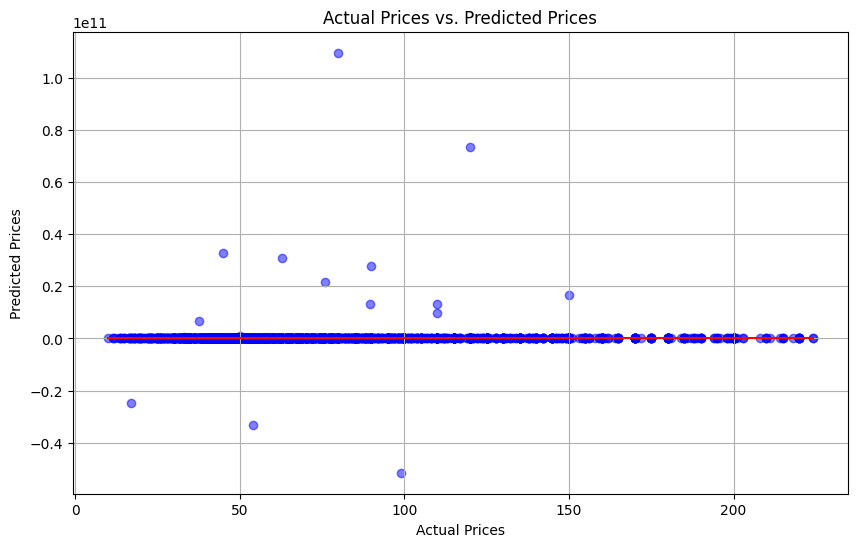

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

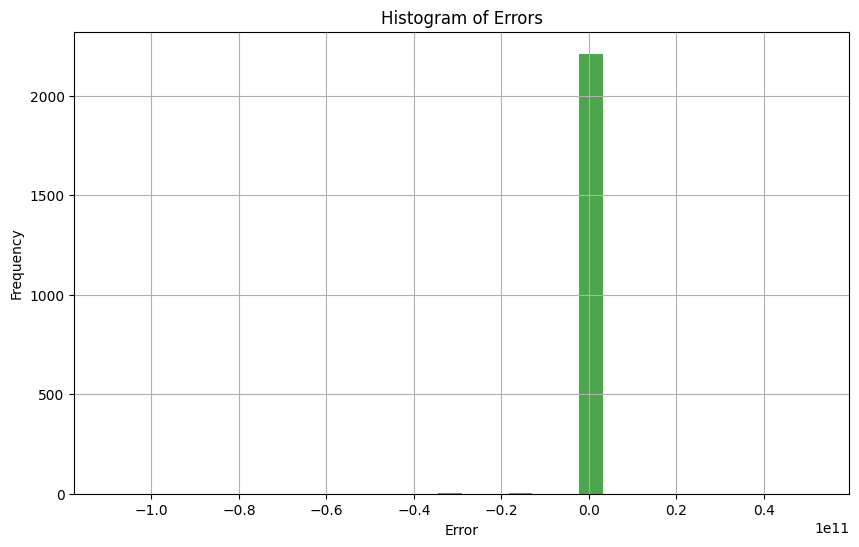

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(error, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [133]:
final_output_df = df_selected.copy()

In [134]:
output_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Error': y_test - y_pred,
    'Squared Error': (y_test - y_pred) ** 2
})

In [135]:
final_output_df = pd.concat([df_selected, output_df], axis=1)

In [136]:
print(final_output_df)

       total_sqft  bath  balcony  size                  location   price  \
0          1056.0   2.0      1.0     2  Electronic City Phase II   39.07   
2          1440.0   2.0      3.0     3               Uttarahalli   62.00   
3          1521.0   3.0      1.0     3        Lingadheeranahalli   95.00   
4          1200.0   2.0      1.0     2                  Kothanur   51.00   
5          1170.0   2.0      1.0     2                Whitefield   38.00   
...           ...   ...      ...   ...                       ...     ...   
13306      1262.0   2.0      2.0     2                 Bellandur   47.00   
13307      1345.0   2.0      1.0     3               Uttarahalli   57.00   
13308      1715.0   3.0      3.0     3         Green Glen Layout  112.00   
13311      1141.0   2.0      1.0     2     Raja Rajeshwari Nagar   60.00   
13313       550.0   1.0      1.0     1              Doddathoguru   17.00   

       Actual Price  Predicted Price      Error  Squared Error  
0             39.07   

In [137]:
final_output_df.dropna(subset=['Actual Price', 'Predicted Price', 'Error', 'Squared Error'], inplace=True)
print(final_output_df)

       total_sqft  bath  balcony  size                  location   price  \
0          1056.0   2.0      1.0     2  Electronic City Phase II   39.07   
4          1200.0   2.0      1.0     2                  Kothanur   51.00   
13         1100.0   2.0      2.0     2                 Gottigere   40.00   
15         1175.0   2.0      2.0     2               Mysore Road   73.50   
20          600.0   1.0      1.0     1                   Kengeri   15.00   
...           ...   ...      ...   ...                       ...     ...   
13298      1187.0   2.0      2.0     2     Raja Rajeshwari Nagar   40.14   
13302      1527.0   3.0      1.0     3         Bannerghatta Road  142.00   
13304      1050.0   2.0      2.0     2              Rachenahalli   52.71   
13311      1141.0   2.0      1.0     2     Raja Rajeshwari Nagar   60.00   
13313       550.0   1.0      1.0     1              Doddathoguru   17.00   

       Actual Price  Predicted Price      Error  Squared Error  
0             39.07   

In [138]:

squared_errors = final_output_df['Error'] ** 2
mean_squared_error = squared_errors.mean()
rmse = np.sqrt(mean_squared_error)

In [139]:
print("Root Mean Squared Error:-", rmse)

Root Mean Squared Error:- 3406122432.904846


In [140]:
final_output_df.to_csv('final_output.csv', index=False)